# REPRODUBILITY CODE FOR CONEÇÔES 2023 ARTICLE
### Importing Libs and Data

In [1]:
import numpy as np
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
data_in=pd.read_excel('PC11_TV_DIR.xlsx')

## Data treatment
treating the data from India government to be like our company database

In [2]:
data_in['Town-Village Name_TR']=[unidecode(name).upper().replace("'","").replace("-"," ")
                           .replace("&","AND").split(" (")[0] for name in data_in['Town-Village Name']]
data_in['Sub District Code']=data_in['Sub District Code'].fillna(0)

## Data manipulation
Adding the name of State, District, and Sub District in each line

In [3]:
states=data_in.drop_duplicates('State Code').set_index('State Code')['Town-Village Name_TR'].to_dict()
data_in['State Name']=data_in.apply(lambda x:states[x['State Code']],axis=1)

In [4]:
District=data_in.drop_duplicates(['State Code','District Code']).query("`District Code`!=0").set_index('District Code')['Town-Village Name_TR'].to_dict()
District[0]=''
data_in['District Name']=data_in.apply(lambda x:District[x['District Code']],axis=1)

In [5]:
subDistrict=data_in.drop_duplicates(['State Code','District Code','Sub District Code']).query("`Sub District Code`!=0").set_index('Sub District Code')['Town-Village Name_TR'].to_dict()
subDistrict[0]=''
data_in['Sub District Name']=data_in.apply(lambda x:subDistrict[x['Sub District Code']],axis=1)

At This moment the 'data_in' dataframe is like the tables of company's database

In [6]:
data_in.head()

,State Code,District Code,Sub District Code,Town-Village Code,Town-Village Name,Town-Village Name_TR,State Name,District Name,Sub District Name
0,1,0,0.0,0,JAMMU & KASHMIR,JAMMU AND KASHMIR,JAMMU AND KASHMIR,,
1,1,0,0.0,800013,Srinagar (M Corp. + OG),SRINAGAR,JAMMU AND KASHMIR,,
2,1,0,0.0,800033,Anantnag (M Cl + OG),ANANTNAG,JAMMU AND KASHMIR,,
3,1,1,0.0,0,Kupwara,KUPWARA,JAMMU AND KASHMIR,KUPWARA,
4,1,1,1.0,0,Kupwara,KUPWARA,JAMMU AND KASHMIR,KUPWARA,KUPWARA


## Extracting Data for 2, 3 and 4 Adm Levels counting the confusion cases

In [7]:
state_cc=0
for i in range(max(data_in['State Code'])):
    ST=data_in.query("`State Code`=="+str(i))
    dupli=ST[ST.duplicated("Town-Village Name_TR",False)]
    if len(dupli)>0:
        state_cc+=len(dupli)
print("Number of confusion cases inside a State",state_cc)

Number of confusion cases inside a State 236259


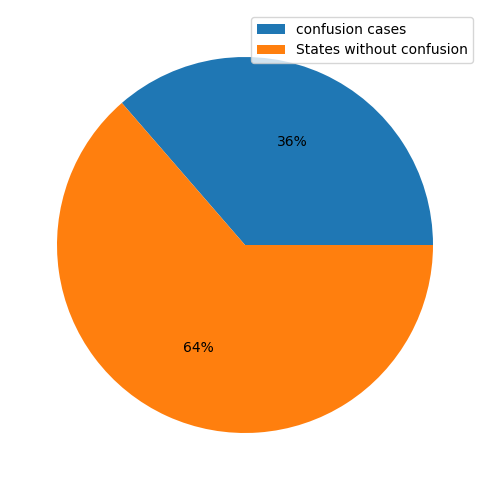

In [8]:
total_villages = len(data_in.drop_duplicates('Town-Village Code'))
state_wo_cc = total_villages  - state_cc
data = (state_cc, state_wo_cc)
fig = plt.figure(figsize =(5, 5))
patches = plt.pie(data, autopct='%1.0f%%')
plt.tight_layout()
plt.legend(labels=['confusion cases', 'States without confusion'])
plt.show()

In [9]:
district_cc=0
for i in range(max(data_in['District Code'])):
    DT=data_in.query("`District Code`=="+str(i))
    dupli=DT[DT.duplicated("Town-Village Name_TR",False)]
    if len(dupli)>0:
        district_cc+=len(dupli)
print("Number of confusion cases inside a District",district_cc)

Number of confusion cases inside a District 119985


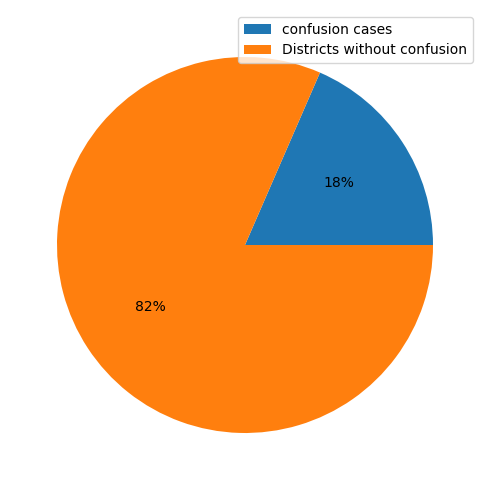

In [10]:
district_wo_cc = total_villages  - district_cc
data = (district_cc, district_wo_cc)
fig = plt.figure(figsize =(5, 5)) 
patches= plt.pie(data, autopct='%1.0f%%') 
plt.tight_layout()
plt.legend( labels=['confusion cases', 'Districts without confusion'])
plt.show()

In [11]:
subdistrict_cc=0
for i in range(int(data_in['Sub District Code'].iloc[-1])):
    SD=data_in.query("`Sub District Code`=="+str(i))
    dupli=SD[SD.duplicated("Town-Village Name_TR",False)]
    if len(dupli)>0:
        subdistrict_cc+=len(dupli)
print("Number of confusion cases inside a subdistrict",subdistrict_cc)

Number of confusion cases inside a subdistrict 39281


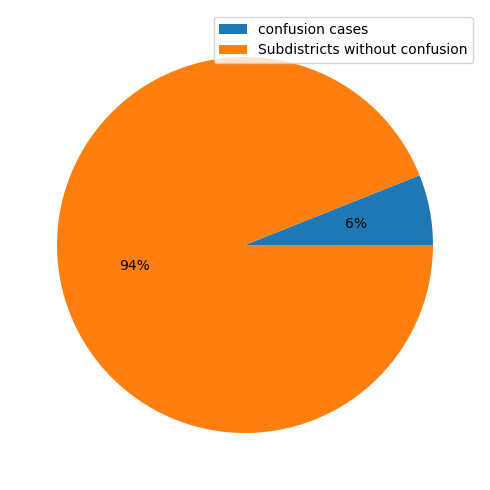

In [12]:
subdistrict_wo_cc = total_villages  - subdistrict_cc
data = (subdistrict_cc, subdistrict_wo_cc)
fig = plt.figure(figsize =(5, 5)) 
patches= plt.pie(data, autopct='%1.0f%%') 
plt.tight_layout()
plt.legend( labels=['confusion cases', 'Subdistricts without confusion'])
plt.show()